# Felipe Veloso Desaf 14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('default_credit.csv').drop('index' , axis=1)

In [2]:
df_dummy = pd.get_dummies(df)

In [3]:
df_dummy = df_dummy.drop('default_No',axis=1).drop('student_No',axis=1)

In [4]:
df = df_dummy

In [5]:
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [6]:
df.shape

(10000, 4)

# Desafío 1: Preparación del ambiente de trabajo

In [7]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import f1_score
#from sklearn.metrics import roc_auc_score
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import LeaveOneOut
#from sklearn.preprocessing import PolynomialFeatures

# Desafío 2: Análisis exploratorio

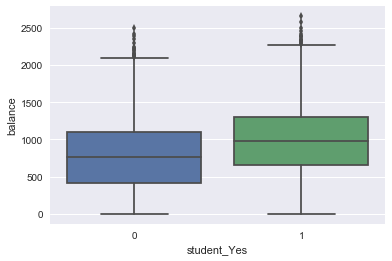

In [8]:
sns.boxplot(x="student_Yes", y="balance", data=df)

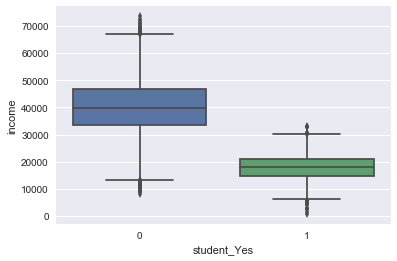

In [9]:
sns.boxplot(x="student_Yes", y="income", data=df)

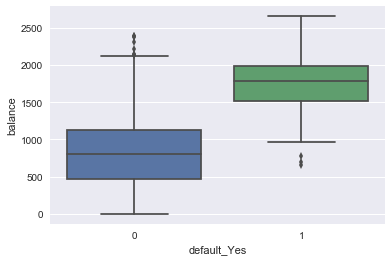

In [10]:
sns.boxplot(x="default_Yes", y="balance", data=df)

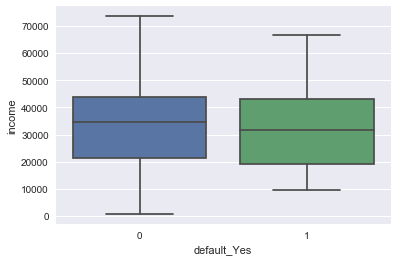

In [11]:
sns.boxplot(x="default_Yes", y="income", data=df)

/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


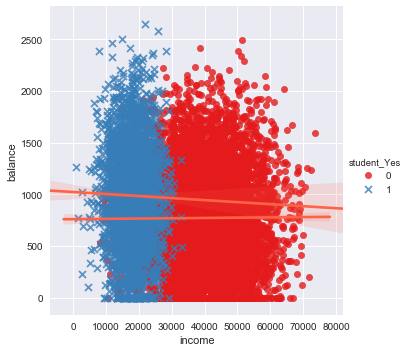

In [12]:
sns.lmplot('income','balance',df, hue='student_Yes',line_kws={'color':'tomato'}, markers=["o", "x"], palette="Set1")

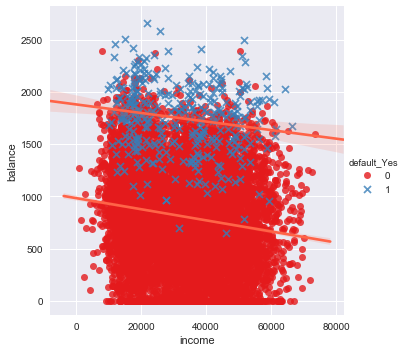

In [13]:
sns.lmplot('income','balance',df, hue='default_Yes',line_kws={'color':'tomato'}, markers=["o", "x"], palette="Set1")

# Desafío 3: Modelación econométrica

In [14]:
logit = smf.logit('default_Yes ~ balance + income + student_Yes',df).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [17]:
estimate_y = (logit.params['Intercept'] + logit.params['balance'] + logit.params['income'] + logit.params['student_Yes'])


In [22]:
def invlogit(x):
    return 1/(1+ np.exp(-x))
print (invlogit(estimate_y))

1.0028379737119136e-05


# Desafío 4: Entrenar

In [21]:
X_train , X_test , y_train , y_test = train_test_split(df.loc[:,'balance':'student_Yes'],
                                                       df['default_Yes'],
                                                       test_size=.33,random_state=11238)

In [32]:
std_matrix = StandardScaler().fit_transform(df.loc[:,'balance':'student_Yes'])
default_model = LogisticRegression().fit(X_train,y_train)

/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
default_model.coef_ ,' def ' ,default_model.intercept_ 

(array([[ 2.00855327e-03, -1.00721791e-04,  4.47573707e+00,
         -2.55105026e+00]]), ' def ', array([-2.59717163]))

In [30]:
model = default_model.predict(X_test)

In [31]:
model

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [36]:
from sklearn.metrics import confusion_matrix

m1_confusion = confusion_matrix(y_test,model)
m1_confusion

array([[3186,    0],
       [  15,   99]])

In [39]:
from sklearn.metrics import accuracy_score
m1_acc = accuracy_score(y_test,model)
m1_acc

0.9954545454545455

In [40]:
# 79% precision de positivos reales
from sklearn.metrics import recall_score
m1_recall = recall_score(y_test,model)
m1_recall

0.868421052631579

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3186
           1       1.00      0.87      0.93       114

   micro avg       1.00      1.00      1.00      3300
   macro avg       1.00      0.93      0.96      3300
weighted avg       1.00      1.00      1.00      3300



In [43]:
from sklearn.metrics import roc_curve
model_pr = default_model.predict_proba(X_test)[:,1]

false_positive, true_positive, threshold = roc_curve(y_test,model_pr)

Text(0.5, 0, 'Falsos Positivos')

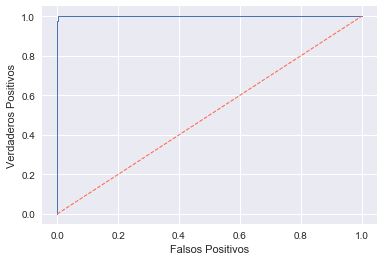

In [44]:
plt.plot(false_positive,true_positive,lw=1)
plt.plot([0,1], linestyle='--', lw=1, color = 'tomato')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
#curva roc

En general  el modelo es bueno, cumple bastante con las expectativas y explica de manera alta la prediccion.